In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler #距離の計算のため、Standardscalerでもまあいい
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster


In [2]:
data = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/math/math_data/dairy_products.csv")
data.head()

,country,butter,milk,cheese
0,中国,0.1,20.3,0.1
1,日本,0.6,30.8,2.4
2,韓国,0.2,32.9,2.8
3,イラン,1.0,27.1,4.7
4,トルコ,0.9,17.8,7.8


In [3]:
X = data.drop("country",axis=1).values
label = data["country"].values

In [16]:
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

result = linkage(X_scaled,method="ward")#linkageが何してくれるかはわかりにくいのでdendrogramで可視化
#ward,single,complete,centroidで変えると、、、

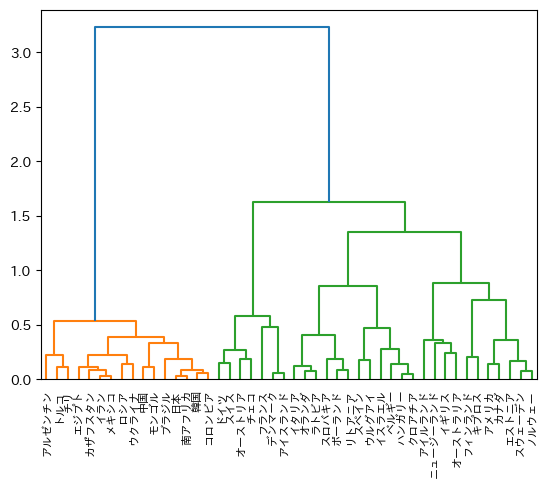

In [17]:
dendrogram(result, labels=label)
plt.show()

In [ ]:
cluster = fcluster(result, t=1, criterion="distance")#tは、dendrogramの高さ
cluster

array([1, 1, 1, 1, 1, 3, 1, 1, 4, 2, 3, 2, 3, 3, 4, 3, 4, 2, 4, 2, 3, 2,
       3, 3, 3, 4, 3, 3, 4, 4, 1, 4, 1, 1, 1, 1, 3, 1, 1, 2, 4, 2, 1, 1,
       4, 4], dtype=int32)

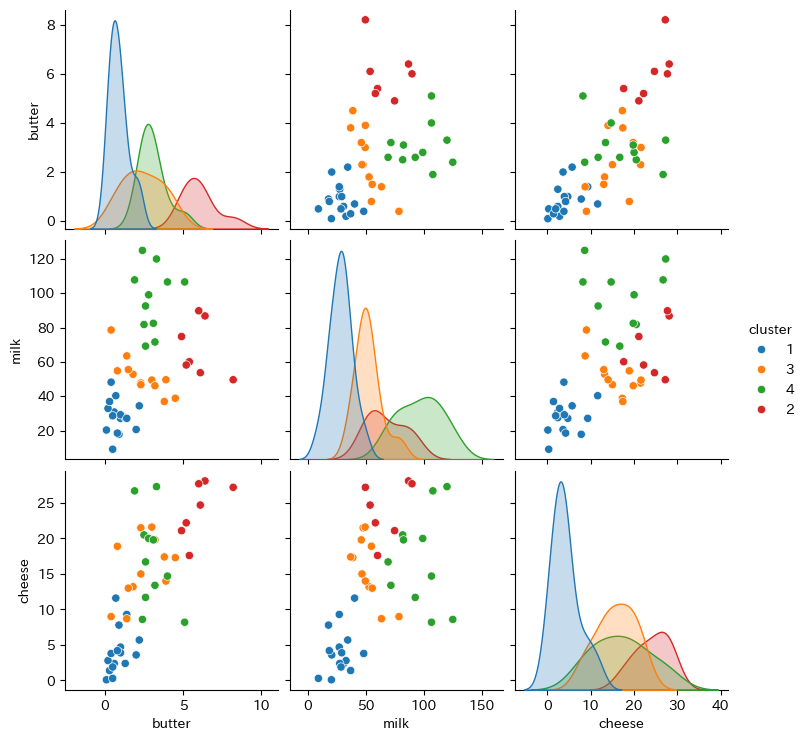

In [8]:
data["cluster"] = cluster.astype("str")
sns.pairplot(data,hue = "cluster")
plt.show()


# ここから練習

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster


In [2]:
data = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/math/math_data/dairy_products.csv")
data.head()

,country,butter,milk,cheese
0,中国,0.1,20.3,0.1
1,日本,0.6,30.8,2.4
2,韓国,0.2,32.9,2.8
3,イラン,1.0,27.1,4.7
4,トルコ,0.9,17.8,7.8


In [3]:
X = data.drop("country",axis=1).values
label = data["country"].values

In [4]:
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

result = linkage(X_scaled,method="ward")

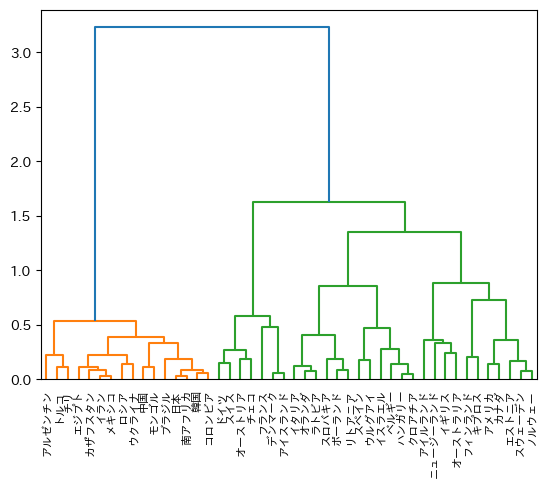

In [6]:
dendrogram(result,labels=label)
plt.show()

In [9]:
cluster = fcluster(result,t=1,criterion="distance")
cluster
#distanceの場合、t=閾値
#maxclustの場合、t=クラスタ数
#

array([1, 1, 1, 1, 1, 3, 1, 1, 4, 2, 3, 2, 3, 3, 4, 3, 4, 2, 4, 2, 3, 2,
       3, 3, 3, 4, 3, 3, 4, 4, 1, 4, 1, 1, 1, 1, 3, 1, 1, 2, 4, 2, 1, 1,
       4, 4], dtype=int32)

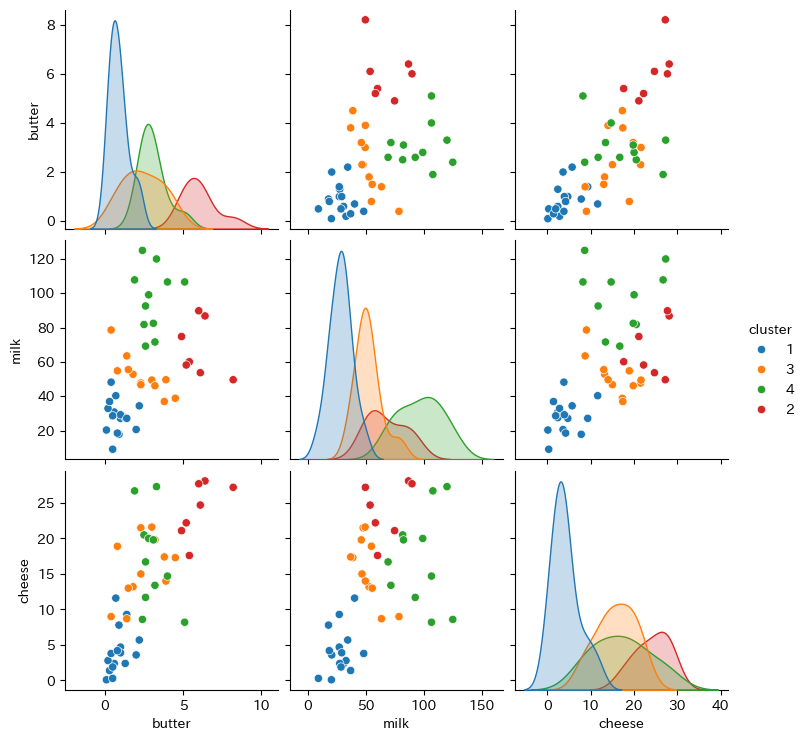

In [12]:
data["cluster"] = cluster.astype(str)
sns.pairplot(data=data,hue="cluster")
plt.show()